# Clustering Crypto

In [116]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [117]:
# Load the crypto_data.csv dataset.
fp = 'crypto_data.csv'
crypt = pd.read_csv(fp)
crypt

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [118]:
# Keep all the cryptocurrencies that are being traded.
crypt = crypt[crypt["IsTrading"] == True]
crypt

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [119]:
# Keep all the cryptocurrencies that have a working algorithm.
crypt = crypt.set_index('Unnamed: 0')
crypt.index.name = None
crypt


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [120]:
# Removethe "IsTrading" column. 
crypt = crypt.drop(columns='IsTrading')
crypt

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [121]:
# Remove rows that have at least 1 null value.
crypt = crypt.dropna()
crypt

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [122]:
# Keep the rows where coins are mined.
crypt = crypt[crypt['TotalCoinsMined'] != 0]
crypt

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [123]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypt_name = pd.DataFrame(crypt['CoinName'])
crypt_name

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [124]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypt_df = crypt.drop(columns=['CoinName'])
crypt_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [125]:
# Use get_dummies() to create variables for text features.
crypt_df2 = pd.get_dummies(crypt_df, columns=['Algorithm','ProofType'])


In [126]:
# Standardize the data with StandardScaler().
crypt_sc = StandardScaler().fit_transform(crypt_df2)
crypt_sc

array([[-0.11674788, -0.15286468, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.09358885, -0.14499604, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [ 0.52587231,  4.4937636 , -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       ...,
       [-0.09523411, -0.13215444, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11658774, -0.15255408, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11674507, -0.15284989, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [127]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)

crypt_pca = pca.fit_transform(crypt_sc)

In [128]:
# Create a DataFrame with the three principal components.
df_crypt_pca = pd.DataFrame(
    data= crypt_pca, columns=["PC1", "PC2","PC3"], index = crypt.index
)
df_crypt_pca.head()

,PC1,PC2,PC3
42,-0.335706,1.048059,-0.550772
404,-0.319026,1.048244,-0.551448
1337,2.341915,1.716346,-0.830994
BTC,-0.136275,-1.318177,0.181794
ETH,-0.147353,-2.014605,0.408203


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\CFP76\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



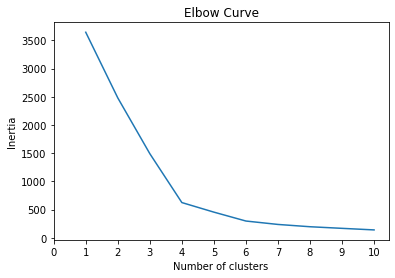

In [129]:
import matplotlib.pyplot as plt
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypt_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Running K-Means with `k=4`

In [130]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4,random_state=0)

# Fit the model
model.fit(df_crypt_pca)

# Predict clusters
predictions = model.predict(df_crypt_pca)

df_crypt_pca["class"] = model.labels_
df_crypt_pca

,PC1,PC2,PC3,class
42,-0.335706,1.048059,-0.550772,0
404,-0.319026,1.048244,-0.551448,0
1337,2.341915,1.716346,-0.830994,0
BTC,-0.136275,-1.318177,0.181794,1
ETH,-0.147353,-2.014605,0.408203,1
...,...,...,...,...
ZEPH,2.425022,0.756618,0.023538,0
GAP,-0.333747,1.047954,-0.550826,0
BDX,0.351512,-2.295614,0.380436,1
ZEN,-0.158729,-2.110426,0.387120,1


In [131]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.merge(crypt_df,df_crypt_pca, right_index = True, left_index = True)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df['CoinName'] = crypt_name

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = df_crypt_pca['class']

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(533, 10)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,class,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.335706,1.048059,-0.550772,0,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.319026,1.048244,-0.551448,0,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.341915,1.716346,-0.830994,0,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.136275,-1.318177,0.181794,1,Bitcoin,1
ETH,Ethash,PoW,1.076842e+08,0,-0.147353,-2.014605,0.408203,1,Ethereum,1
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.177405,-1.112674,0.064710,1,Litecoin,1
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.361361,1.192111,-0.582330,0,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.141137,-2.195897,0.364687,1,Monero,1
ETC,Ethash,PoW,1.133597e+08,210000000,-0.145791,-2.014696,0.408162,1,Ethereum Classic,1
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.158728,-2.110426,0.387120,1,ZCash,1


In [132]:
clustered_df = clustered_df.drop(columns='class')

In [133]:
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.335706,1.048059,-0.550772,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.319026,1.048244,-0.551448,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.341915,1.716346,-0.830994,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.136275,-1.318177,0.181794,Bitcoin,1
ETH,Ethash,PoW,1.076842e+08,0,-0.147353,-2.014605,0.408203,Ethereum,1


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [134]:
# Creating a 3D-Scatter with the PCA data and the clusters
import plotly.express as px
fig = px.scatter_3d(
    clustered_df,
     x="PC3",
     y="PC2",
     z="PC1",
     color="Class",
     symbol="Class",
     width=800,
     hover_name = "CoinName",
     hover_data = ["Algorithm"]
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [135]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType','TotalCoinSupply','TotalCoinsMined','Class'], sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [136]:
# Print the total number of tradable cryptocurrencies.
print(len(clustered_df))

533


In [141]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
mmsc = MinMaxScaler()
clust_sc = mmsc.fit_transform(clustered_df[['TotalCoinSupply','TotalCoinsMined']])
clust_sc


array([[4.20000000e-11, 5.94230127e-03],
       [5.32000000e-04, 7.00182308e-03],
       [3.14159265e-01, 3.53420682e-02],
       ...,
       [1.40022261e-03, 6.92655266e-03],
       [2.10000000e-05, 5.94962775e-03],
       [1.00000000e-06, 5.94243008e-03]])

In [145]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(clust_sc, columns = ['TotalCoinSupply','TotalCoinsMined'], index = clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df['CoinName'] = crypt_name

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class'] = clustered_df['Class']

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.005942,42 Coin,0
404,5.320000e-04,0.007002,404Coin,0
1337,3.141593e-01,0.035342,EliteCoin,0
BTC,2.100000e-05,0.005960,Bitcoin,1
ETH,0.000000e+00,0.006050,Ethereum,1
LTC,8.400000e-05,0.006006,Litecoin,1
DASH,2.200000e-05,0.005951,Dash,0
XMR,0.000000e+00,0.005960,Monero,1
ETC,2.100000e-04,0.006056,Ethereum Classic,1
ZEC,2.100000e-05,0.005950,ZCash,1


In [152]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(x="TotalCoinsMined",y="TotalCoinSupply",by = "Class", hover_cols= "CoinName")


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)

In [151]:
hvplot.help('scatter')


Scatter plot

Parameters
----------
x, y : string, optional
    Field name to draw x- and y-positions from
c: string, optional
    Name of the field to color points by
s: string, optional
    Name of the field to scale point size by
scale: number, optional
    Scaling factor to apply to point scaling
**kwds : optional
    Keyword arguments to pass on to
    :py:meth:`hvplot.converter.HoloViewsConverter`.
Returns
-------
obj : HoloViews object
    The HoloViews representation of the plot.


Generic options
---------------
clim: tuple
    Lower and upper bound of the color scale
cnorm (default='linear'): str
    Color scaling which must be one of 'linear', 'log' or 'eq_hist'
colorbar (default=False): boolean
    Enables a colorbar
fontscale: number
    Scales the size of all fonts by the same amount, e.g. fontscale=1.5
    enlarges all fonts (title, xticks, labels etc.) by 50%
fontsize: number or dict
    Set title, label and legend text to the same fontsize. Finer control
    by using 